In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
data_mkt_cap=pd.read_csv('data_mkt_cap.csv')
data_last=pd.read_csv('data_last.csv')
data_volume=pd.read_csv('data_volume.csv')
data_sector=pd.read_csv('data_sector.csv')

# Data Preprocessing

In [3]:
#Check the number of nan in data_mkt_cap
nan_positions_cap = data_mkt_cap.isnull().stack()
nan_positions_cap = nan_positions_cap[nan_positions_cap]
print(nan_positions_cap)

95940   mkt_cap    True
95941   mkt_cap    True
95942   mkt_cap    True
95943   mkt_cap    True
95944   mkt_cap    True
                   ... 
396879  mkt_cap    True
396880  mkt_cap    True
396881  mkt_cap    True
396882  mkt_cap    True
396883  mkt_cap    True
Length: 2846, dtype: bool


In [4]:
#Check the number of nan in data_last
nan_positions_last = data_last.isnull().stack()
nan_positions_last = nan_positions_last[nan_positions_last]
print(nan_positions_last)

95940   last    True
95941   last    True
95942   last    True
95943   last    True
95944   last    True
                ... 
396879  last    True
396880  last    True
396881  last    True
396882  last    True
396883  last    True
Length: 2846, dtype: bool


In [5]:
#Check Consistency
sum(nan_positions_cap.index.get_level_values(0)!=nan_positions_last.index.get_level_values(0))

0

Analysis: Because result is 0, thus:  

1. Because the null values are exist at same time for two tables, thus, we could rationally guess that, it is may because those stocks do not exist during that period. 
2. Those null value at market capital cannot use the production of volume and close price to fill them.

# Stock index Construction

In [6]:
#Preprocessing:
data_mkt_cap['date'] = pd.to_datetime(data_mkt_cap['date'])
data_mkt_cap.set_index('date', inplace=True)

data_mkt_cap = data_mkt_cap.pivot(columns='ticker', values='mkt_cap')
data_mkt_cap["Total_cap"]=data_mkt_cap.sum(axis=1)
data_mkt_cap

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9843 JT,9983 JT,9984 JT,Total_cap
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,199642.95,167448.97,84317.35,1532515.13,337413.0,1224732.05,924975.37,909157.35,392536.69,1044624.28,...,896903.70,771081.78,1705440.00,101896.44,1920446.91,827995.0,1852840.20,3416632.46,9632979.51,4.086578e+08
2017-08-17,199018.09,166395.84,84317.35,1510580.28,334311.0,1216704.78,920646.31,916253.98,397650.19,1047796.21,...,894403.62,772026.74,1697025.00,100554.43,1889652.57,846650.0,1863140.11,3406025.09,9621972.91,4.083543e+08
2017-08-18,196518.64,165342.70,84317.35,1500344.01,326133.0,1200650.24,917038.76,900483.69,397950.99,1029821.91,...,883986.62,758797.39,1683000.00,97966.28,1878221.34,826560.0,1827662.63,3325409.12,9598859.04,4.039069e+08
2017-08-21,193394.34,165605.98,84317.35,1522278.87,323877.0,1235052.83,930747.44,908368.83,403064.49,1056254.71,...,892528.56,757852.44,1673182.50,98924.86,1875655.15,825125.0,1839106.98,3280858.18,9533920.08,4.029237e+08
2017-08-22,190270.04,162709.85,84317.35,1527397.00,324864.0,1237346.34,926418.39,895752.60,404267.67,1055197.40,...,884611.64,755962.53,1668975.00,98158.00,1880320.95,826560.0,1835673.68,3278736.71,9557033.95,4.031508e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,297621.08,149586.91,84317.35,2532122.63,439698.0,888547.79,1045828.23,646105.98,557823.21,1468342.07,...,1247539.92,906717.46,3414386.25,124518.79,2547634.89,1446480.0,2515468.04,13766239.08,12921258.07,7.200298e+08
2024-03-01,297152.44,148221.28,84317.35,2603893.39,450870.0,891001.82,1067112.77,647816.44,561432.74,1477064.89,...,1275874.16,908022.89,3440332.50,124518.79,2622290.85,1471592.5,2552662.18,14119464.35,13093247.51,7.300685e+08
2024-03-04,295215.37,143087.53,84317.35,2619632.59,453663.0,883073.41,1051239.55,642536.33,552860.10,1458561.93,...,1268790.60,908209.38,3466980.00,124518.79,2638621.85,1473027.5,2518329.13,14055820.16,13132937.38,7.299549e+08


In [7]:
#Calculate weight:
daily_weight=data_mkt_cap.div(data_mkt_cap["Total_cap"],axis=0)
daily_weight

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9843 JT,9983 JT,9984 JT,Total_cap
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,0.000489,0.000410,0.000206,0.003750,0.000826,0.002997,0.002263,0.002225,0.000961,0.002556,...,0.002195,0.001887,0.004173,0.000249,0.004699,0.002026,0.004534,0.008361,0.023572,1.0
2017-08-17,0.000487,0.000407,0.000206,0.003699,0.000819,0.002980,0.002255,0.002244,0.000974,0.002566,...,0.002190,0.001891,0.004156,0.000246,0.004627,0.002073,0.004563,0.008341,0.023563,1.0
2017-08-18,0.000487,0.000409,0.000209,0.003715,0.000807,0.002973,0.002270,0.002229,0.000985,0.002550,...,0.002189,0.001879,0.004167,0.000243,0.004650,0.002046,0.004525,0.008233,0.023765,1.0
2017-08-21,0.000480,0.000411,0.000209,0.003778,0.000804,0.003065,0.002310,0.002254,0.001000,0.002621,...,0.002215,0.001881,0.004153,0.000246,0.004655,0.002048,0.004564,0.008143,0.023662,1.0
2017-08-22,0.000472,0.000404,0.000209,0.003789,0.000806,0.003069,0.002298,0.002222,0.001003,0.002617,...,0.002194,0.001875,0.004140,0.000243,0.004664,0.002050,0.004553,0.008133,0.023706,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,0.000413,0.000208,0.000117,0.003517,0.000611,0.001234,0.001452,0.000897,0.000775,0.002039,...,0.001733,0.001259,0.004742,0.000173,0.003538,0.002009,0.003494,0.019119,0.017945,1.0
2024-03-01,0.000407,0.000203,0.000115,0.003567,0.000618,0.001220,0.001462,0.000887,0.000769,0.002023,...,0.001748,0.001244,0.004712,0.000171,0.003592,0.002016,0.003496,0.019340,0.017934,1.0
2024-03-04,0.000404,0.000196,0.000116,0.003589,0.000621,0.001210,0.001440,0.000880,0.000757,0.001998,...,0.001738,0.001244,0.004750,0.000171,0.003615,0.002018,0.003450,0.019256,0.017991,1.0


In [8]:
#Daily Return of Each Stocks
data_last['date'] = pd.to_datetime(data_last['date'])
data_last.set_index('date', inplace=True)
data_last = data_last.pivot(columns='ticker', values='last')
data_returns=data_last.pct_change()
data_returns

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9843 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17,-0.003131,-0.006289,0.0,-0.014316,-0.009193,-0.006553,-0.004687,0.007814,0.013027,0.003036,...,-0.008407,-0.002790,0.001225,-0.004932,-0.013171,-0.016036,0.022531,0.005559,-0.003105,-0.001143
2017-08-18,-0.012563,-0.006329,0.0,-0.006778,-0.024459,-0.013197,-0.003910,-0.017219,0.000758,-0.017153,...,-0.005879,-0.011644,-0.017136,-0.008267,-0.025738,-0.006048,-0.023729,-0.019042,-0.023668,-0.002403
2017-08-21,-0.015886,0.001591,0.0,0.014623,-0.006919,0.028655,0.014948,0.008755,0.012849,0.025665,...,0.030619,0.009660,-0.001245,-0.005828,0.009787,-0.001367,-0.001736,0.006262,-0.013397,-0.006763
2017-08-22,-0.016161,-0.017488,0.0,0.003357,0.003048,0.001856,-0.004658,-0.013882,0.002990,-0.001001,...,-0.021608,-0.008871,-0.002493,-0.002514,-0.007749,0.002488,0.001739,-0.001867,-0.000647,0.002423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,0.001577,0.013884,0.0,0.005249,-0.009290,-0.009678,0.005899,-0.015413,-0.010670,0.007070,...,-0.043186,-0.016103,-0.007755,-0.016959,0.000000,-0.004104,-0.000991,0.010342,0.001157,-0.014574
2024-03-01,-0.001575,-0.009129,0.0,0.028344,0.025408,0.002762,0.020352,0.002647,0.006471,0.005941,...,0.009454,0.022712,0.001440,0.007599,0.000000,0.029304,0.017361,0.014786,0.025659,0.013311
2024-03-04,-0.006519,-0.034636,0.0,0.006044,0.006195,-0.008898,-0.014875,-0.008151,-0.015269,-0.012527,...,-0.004834,-0.005552,0.000205,0.007746,0.000000,0.006228,0.000975,-0.013450,-0.004508,0.003031


Analysis:  It is rational that the first line is nan, because we don't have previous data.

## Method 1: calculate return using weights calculated at the today

In [9]:
#Method1:calculate return using weights calculated at today
index_returns_toweight=(data_returns*(daily_weight.iloc[:,:-1])).sum(axis=1) #calculate return using weights calculated at the previous trading date
#Calcuate Index Level
index_level_toweight=(1+index_returns_toweight).cumprod()
#Set 2020-01-06 1000 points
index_level_toweight=(index_level_toweight/index_level_toweight['2020-01-06'])*1000
index_level_toweight

date
2017-08-16     792.254702
2017-08-17     791.725925
2017-08-18     783.139454
2017-08-21     781.306709
2017-08-22     781.800649
                 ...     
2024-02-29    2371.985018
2024-03-01    2405.478145
2024-03-04    2405.570352
2024-03-05    2419.321068
2024-03-06    2426.049173
Length: 1599, dtype: float64

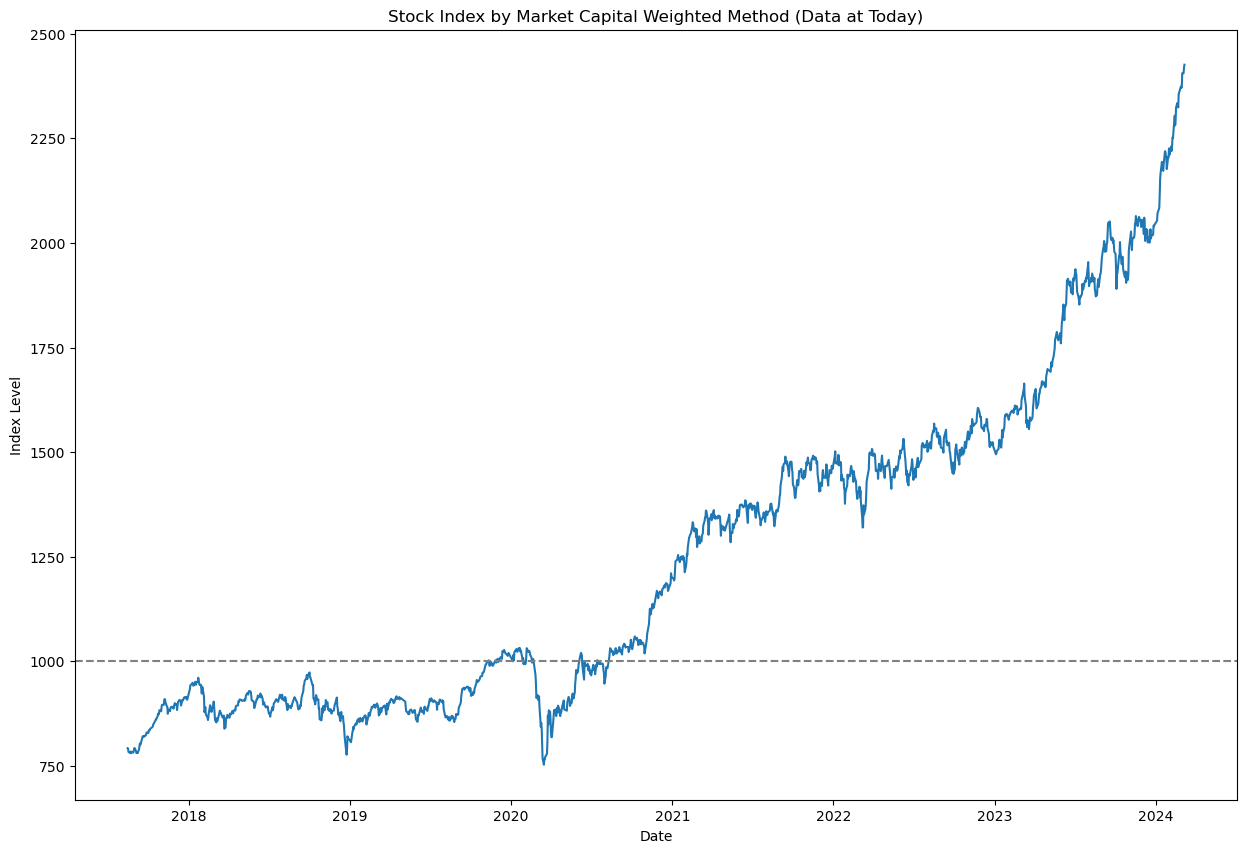

In [10]:
#Make Line Plot
plt.figure(figsize=(15,10))
plt.plot(index_level_toweight)
plt.axhline(y=1000, linestyle='--',color='gray')
plt.title("Stock Index by Market Capital Weighted Method (Data at Today)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.show()

Analysis: Based on this figure, we can find that, the stock index is not mean-convergent process. With time increasing, the index value is also increasing dramatically. After the third quarter in 2020, the index value was greater than the base level and continuously rise.

## [P.S.] Method 2: calculate return using weights calculated at the previous trading date
Because sometimes, in reality, people do not know the current weights just know the previous weights, so we use this method to calculate it.

In [11]:
#Method1:calculate return using weights calculated at the previous trading date
index_returns_prevweight=(data_returns*(daily_weight.iloc[:,:-1]).shift(1)).sum(axis=1) 
#Calcuate Index Level
index_level_prevweight=(1+index_returns_prevweight).cumprod()
#Set 2020-01-06 1000 points
index_level_prevweight=(index_level_prevweight/index_level_prevweight['2020-01-06'])*1000
index_level_prevweight

date
2017-08-16     880.295632
2017-08-17     879.642345
2017-08-18     870.040799
2017-08-21     867.922909
2017-08-22     868.411441
                 ...     
2024-02-29    1847.750209
2024-03-01    1873.511658
2024-03-04    1873.220233
2024-03-05    1883.452865
2024-03-06    1888.427313
Length: 1599, dtype: float64

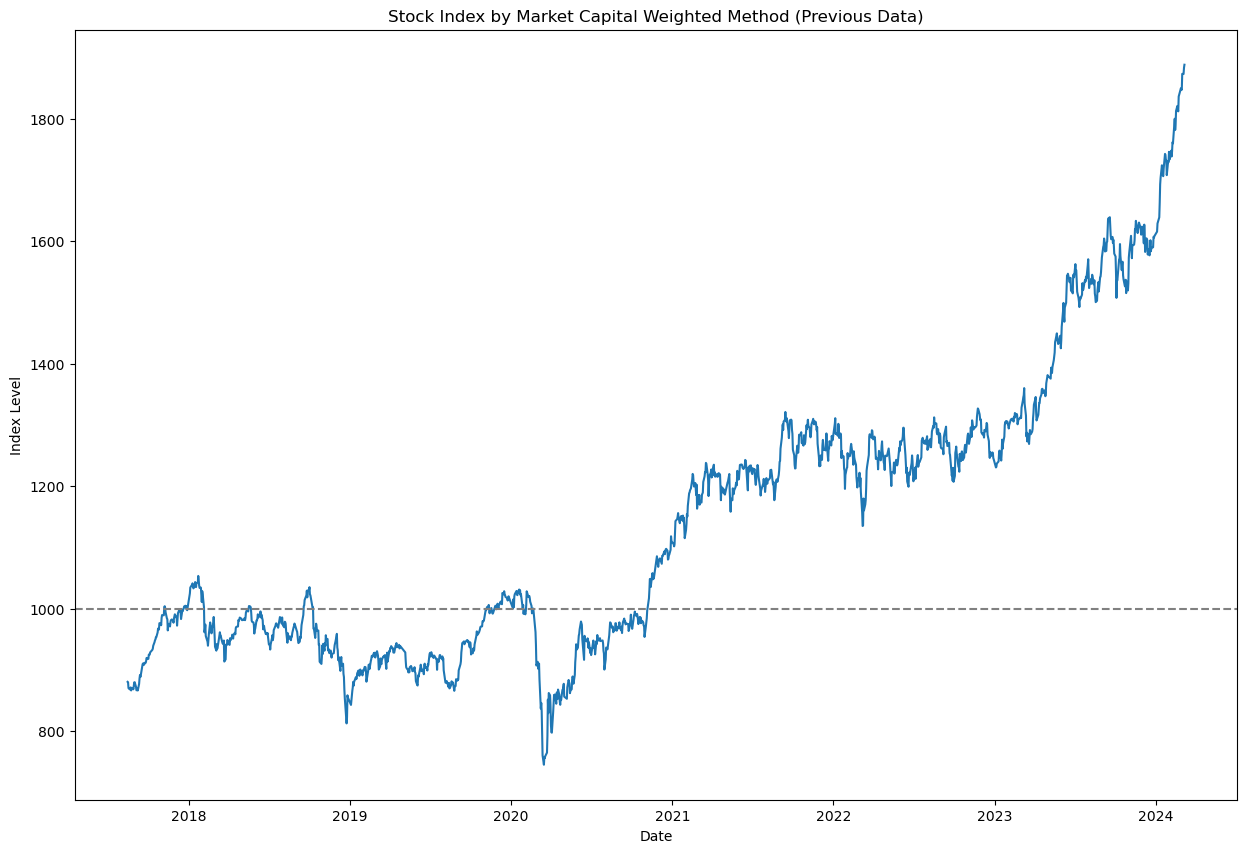

In [12]:
#Make Line Plot
plt.figure(figsize=(15,10))
plt.plot(index_level_prevweight)
plt.axhline(y=1000, linestyle='--',color='gray')
plt.title("Stock Index by Market Capital Weighted Method (Previous Data)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.show()

Analysis: Based on this figure, we can find that, even though we use different method to calculate the index value, the general trend is similar and the fluctuation range is relatively same. Thus, we could deduct that use this method to approximate the true value of market capital based stock index is rational. And at the following task, we would choose the method one to do the following analysis.

# Mining Contributors

In [13]:
#Here we use current weight to calculate its constribution
#Because we want to have their daily contribution
daily_contribution=data_returns*(daily_weight.iloc[:,:-1])
daily_contribution_Jan=daily_contribution[(daily_contribution.index>='2021-01-01')&(daily_contribution.index<'2021-02-01')]

In [14]:
#Mining Contributors
c_name=['date']+[f'positive_{i}_name' for i in range(1,6)]+[f'positive_{i}_value' for i in range(1,6)]+[f'negative_{i}_name' for i in range(1,6)]+[f'negative_{i}_value' for i in range(1,6)]
contributor_board=pd.DataFrame(columns=c_name)
for i in daily_contribution_Jan.index:
    #Ignore those na case (that means they are not exist during that period)
    sort=(daily_contribution_Jan.loc[i][daily_contribution_Jan.loc[i].notna()]).sort_values()
    positive_name=sort.index[-5:]
    positive=sort[-5:]
    negative_name=sort.index[:5]
    negative=sort[:5]
    
    #positive 1 has strongest positive effect on index increasing movement
    #negative 1 has strongest negative effect on index decreasing movement
    contributor_board = pd.concat([contributor_board, pd.DataFrame({
        'date': [i],
        **{f'positive_{j}_name': [positive_name[-j]] for j in range(1, 6)},
        **{f'positive_{j}_value': [positive[-j]] for j in range(1, 6)},
        **{f'negative_{j}_name': [negative_name[j-1]] for j in range(1, 6)},
        **{f'negative_{j}_value': [negative[j-1]] for j in range(1, 6)}
    })], ignore_index=True)

#Reorder for better visualization
column_order = ['date']
for j in range(1, 6):
    column_order.append(f'positive_{j}_name')
    column_order.append(f'positive_{j}_value')
for j in range(1, 6):
    column_order.append(f'negative_{j}_name')
    column_order.append(f'negative_{j}_value')

contributor_board = contributor_board[column_order]
contributor_board.set_index('date')

,positive_1_name,positive_1_value,positive_2_name,positive_2_value,positive_3_name,positive_3_value,positive_4_name,positive_4_value,positive_5_name,positive_5_value,negative_1_name,negative_1_value,negative_2_name,negative_2_value,negative_3_name,negative_3_value,negative_4_name,negative_4_value,negative_5_name,negative_5_value
date,,,,,,,,,,,,,,,,,,,,
2021-01-04,2413 JT,0.000653,9432 JT,0.000571,6758 JT,0.000405,4568 JT,0.000367,6594 JT,0.000210,4661 JT,-0.000440,9983 JT,-0.000313,7751 JT,-0.000261,7733 JT,-0.000222,9984 JT,-0.000219
2021-01-05,6758 JT,0.000365,8035 JT,0.000331,6981 JT,0.000311,6594 JT,0.000237,4689 JT,0.000235,7203 JT,-0.000789,4568 JT,-0.000459,4519 JT,-0.000413,9983 JT,-0.000413,6861 JT,-0.000346
2021-01-06,9432 JT,0.000562,9984 JT,0.000446,8306 JT,0.000389,8316 JT,0.000386,4689 JT,0.000329,6758 JT,-0.000624,6861 JT,-0.000597,9983 JT,-0.000482,7974 JT,-0.000356,2413 JT,-0.000327
2021-01-07,4063 JT,0.000689,6861 JT,0.000687,4568 JT,0.000614,2413 JT,0.000554,8316 JT,0.000541,9984 JT,-0.000542,4911 JT,-0.000110,4689 JT,-0.000102,9433 JT,-0.000081,9020 JT,-0.000042
2021-01-08,6861 JT,0.000842,7203 JT,0.000817,9983 JT,0.000759,6758 JT,0.000726,4519 JT,0.000699,7733 JT,-0.000123,7741 JT,-0.000121,7201 JT,-0.000075,8801 JT,-0.000062,6326 JT,-0.000050
2021-01-12,4519 JT,0.001182,4063 JT,0.000547,9984 JT,0.000469,4502 JT,0.000397,6758 JT,0.000350,9432 JT,-0.000551,2413 JT,-0.000428,7203 JT,-0.000310,6902 JT,-0.000210,6098 JT,-0.000207
2021-01-13,9984 JT,0.000992,8035 JT,0.000721,6098 JT,0.000341,9983 JT,0.000222,9433 JT,0.000218,6758 JT,-0.000378,7203 JT,-0.000302,6861 JT,-0.000297,4063 JT,-0.000216,4502 JT,-0.000216
2021-01-14,9984 JT,0.001058,9983 JT,0.000333,6098 JT,0.000332,5108 JT,0.000287,6273 JT,0.000268,6594 JT,-0.000496,4063 JT,-0.000252,8035 JT,-0.000218,4502 JT,-0.000175,7741 JT,-0.000160
2021-01-15,8035 JT,0.000547,7751 JT,0.000511,4519 JT,0.000318,9433 JT,0.000189,4523 JT,0.000118,7203 JT,-0.000847,6594 JT,-0.000584,9983 JT,-0.000558,6758 JT,-0.000478,4661 JT,-0.000351


Analysis: 

1. The data indicates that stocks such as 9984 JT and 6861 JT have overall positive growth with some fluctuations. On the other hand, stocks like 7203 JT seem to face downward pressures more frequently. The stock 4519 JT showed outstanding performance on 2021-01-12 but requires more data to determine a long-term trend.

2. It's important to note that past performance is not indicative of future results, and this analysis should be supplemented with additional market research and data.

# Density Plot

In [15]:
data_last_origin=pd.read_csv('data_last.csv')
data_sector_origin=pd.read_csv('data_sector.csv')

In [16]:
data_last_part = data_last_origin.loc[(data_last_origin['date'] >= '2022-01-01') & (data_last_origin['date'] < '2023-01-01')]
data_price_sector=pd.merge(data_last_part,data_sector_origin,on='ticker')
data_price_sector['daily_return'] = data_price_sector.groupby('ticker')['last'].pct_change()
data_price_sector=data_price_sector.fillna(method='ffill')
data_price_sector = data_price_sector.fillna(method='bfill')
data_price_sector

,ticker,date,last,bics_sector,daily_return
0,1332 JT,2022-01-04,518.66,"Consumer, Non-cyclical",0.016331
1,1332 JT,2022-01-05,527.13,"Consumer, Non-cyclical",0.016331
2,1332 JT,2022-01-06,517.72,"Consumer, Non-cyclical",-0.017851
3,1332 JT,2022-01-07,513.01,"Consumer, Non-cyclical",-0.009098
4,1332 JT,2022-01-11,514.90,"Consumer, Non-cyclical",0.003684
...,...,...,...,...,...
64167,9984 JT,2022-12-26,5733.79,Communications,0.003648
64168,9984 JT,2022-12-27,5751.65,Communications,0.003115
64169,9984 JT,2022-12-28,5667.30,Communications,-0.014665
64170,9984 JT,2022-12-29,5575.01,Communications,-0.016285


D:\APP\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\20117\AppData\Local\Temp\ipykernel_49172\685925200.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 1])


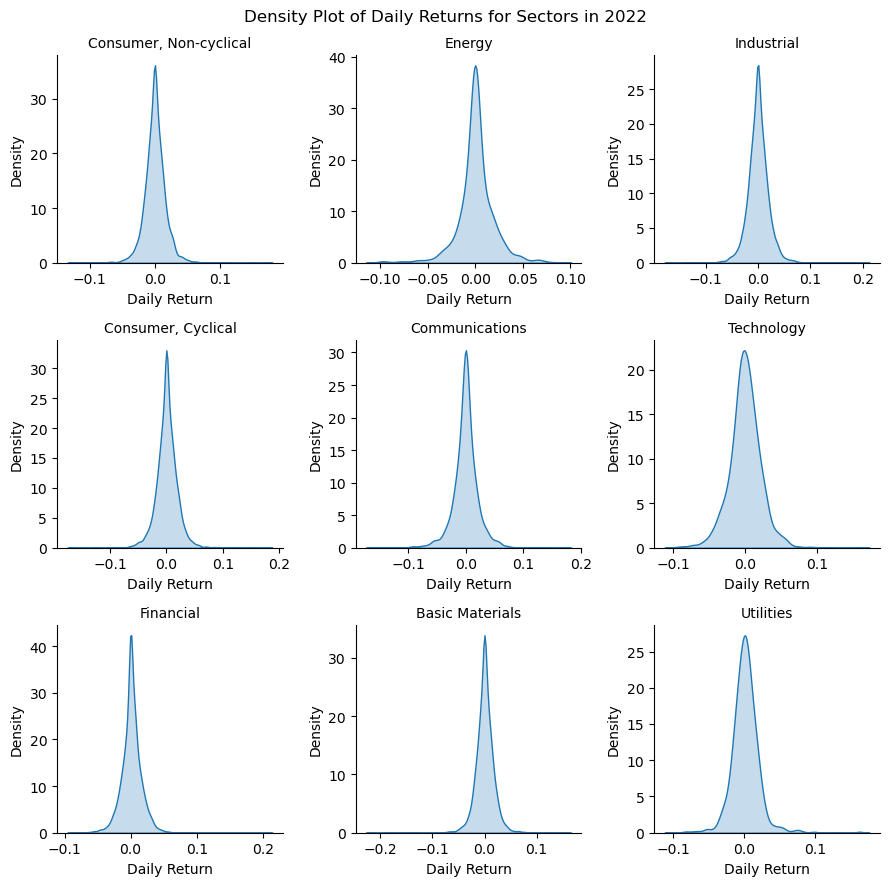

In [17]:
result = sns.FacetGrid(data_price_sector, col='bics_sector', col_wrap=3, sharex=False, sharey=False)
result.map(sns.kdeplot, 'daily_return', fill=True)
result.fig.suptitle('Density Plot of Daily Returns for Sectors in 2022', fontsize=12)
result.set(xlabel='Daily Return', ylabel='Density')
result.set_titles('{col_name}')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Analysis:  

According to those figures, we could find that, the distributions of different industries seems like Leptokurtic, which means they have sharpe peak and fatter tails. It means there might be a higher-than-expected risk of extreme market movements, which could affect investments and risk management strategies. And investors need to be aware of the tail risk, as traditional models based on normal distributions might underestimate the probability of extreme losses (or gains).